# **9. Support Vector Machines (SVM)**

SVM (Support Vector Machine) is a widely used classification technique. The fundamental idea behind SVM is that when you plot two variables against each other (e.g., Petal Length and Petal Width from the Iris dataset), the optimal classifier is the one that maximizes the margin, which is the distance between the closest points from each class. This line, which separates the points, is called the decision boundary.

In SVM, the points closest to the decision boundary are called support vectors. These support vectors are crucial, as they determine the position and orientation of the hyperplane. The goal of SVM is to maximize the distance between these support vectors and the decision boundary, ensuring the best separation between the classes.

For higher-dimensional datasets (more than two variables), the decision boundary becomes a *hyperplane*—a generalization of a plane in n-dimensional space. SVM then draws this hyperplane in such a way that it maximizes the margin between different classes.

### **Gamma (in SVM)**:
- **Gamma** is a hyperparameter used in **Support Vector Machines (SVM)**, specifically in the **RBF (Radial Basis Function)** kernel.
- **Role**: It controls the **spread** or **influence** of a single training point.
  - A **high gamma** value means each data point has a very small influence (more localized), leading to a **complex model**.
  - A **low gamma** value means each data point has a larger influence, leading to a **simpler model**.
- **Impact on Decision Boundary**:
  - High gamma can result in a **highly flexible decision boundary** that may overfit the data (too complex).
  - Low gamma can result in an **underfitted model** with a more general decision boundary (too simple).
  
### **Regularization**:
- **Regularization** is a technique used in machine learning models (like **SVM** or **Logistic Regression**) to prevent **overfitting** by adding a penalty term to the objective function.
- **Purpose**: It discourages overly complex models that fit the training data too well but fail to generalize to new data.
- **For SVM**, the regularization parameter is often denoted as **C**:
  - **High C**: Encourages a **smaller margin** but fewer misclassifications (less regularization, may overfit).
  - **Low C**: Allows for a **larger margin** even if there are more misclassifications (more regularization, may underfit).
  
### **Key Takeaways**:
- **Gamma** controls the **complexity** of the decision boundary in SVM, affecting model flexibility.
- **Regularization** (via parameter **C**) ensures the model isn't too complex by balancing **bias and variance**, preventing overfitting.

### **1. Iris Dataset Classification**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 1. Create input and target dataframes
X = df.drop("species", axis=1)
y = df[["species"]]

In [ ]:
# 2. Do some data wrangling; transform the non-numeric names into numeric names
le = LabelEncoder()
df['target'] = le.fit_transform(y)
# 0 = Seretosa
# 1 = Versicolor
# 2 = Virginica

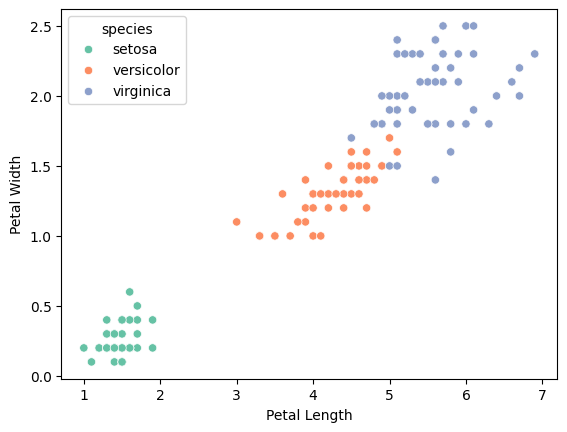

In [ ]:
# 3.1 Plot Petal Length against Petal Width
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set2')

# Add labels to the axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Show the plot
plt.show()


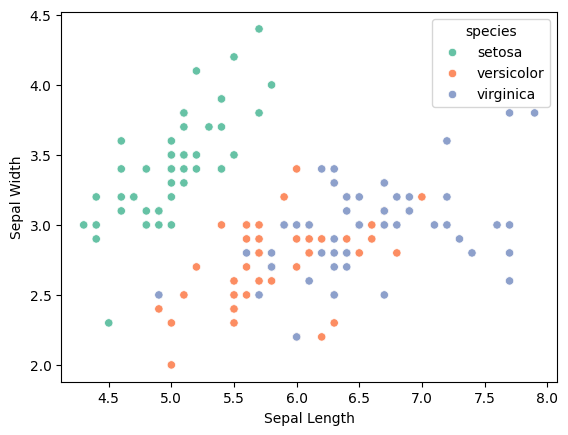

In [ ]:
# 3.2 Plot Sepal Length against Sepal Width
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='Set2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
# 4. Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

In [ ]:
# 5. Create an SVM object, fit the model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# 6. Check model score
model.score(X_test, y_test)

1.0

## **2. Digits Dataset Classification**

The `load_digits()` function from the `sklearn.datasets` module loads the Digits dataset, which is used for digit recognition tasks. This dataset is not a DataFrame but an object of type `Bunch`. This object behaves like a dictionary and contains several attributes.

Here are some key components of the `digits` object:

- **`digits.data`**: A 2D NumPy array of shape (n_samples, n_features), where each row represents a sample (a digit image) and each column represents a pixel.
- **`digits.target`**: A 1D NumPy array of shape (n_samples,) that contains the label (0-9) corresponding to each digit image.
- **`digits.images`**: A 3D NumPy array of shape (n_samples, 8, 8), representing the actual images of the digits in an 8x8 format.
- **`digits.DESCR`**: A string describing the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

In [11]:
digits = load_digits()
dir(digits)

sklearn.utils._bunch.Bunch

In [13]:
# 1. Do some data manipulation; convert into a dataframe
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [19]:
# 2. Create a test/train split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(1437, 360)

In [20]:
# 3. Fit a Support Vector Machine model, check it's score
from sklearn.svm import SVC
model = SVC(C = 1)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9861111111111112

In [21]:
# 4. Create a confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]])

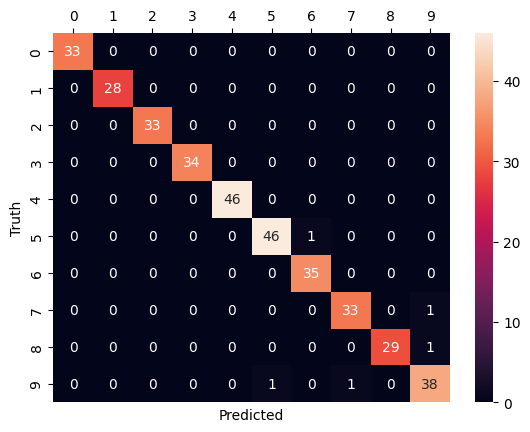

In [24]:
# 5. Create a Seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.gca().xaxis.set_ticks_position('top')
plt.show()

## **Summary:**

This confusion matrix shows the performance of a classifier on a 10-class problem, with classes labeled from 0 to 9.

1. **Diagonal values** (e.g., 33, 28, 33, ...) indicate correct predictions, where the predicted class matches the true class. High values on the diagonal mean the classifier performed well on those classes.

2. **Non-diagonal values** (e.g., values like `1` at positions `[5,6]`, `[7,9]`, `[8,9]`, etc.) represent misclassifications, where the predicted class did not match the true class.

### Summary by class:
- **Class 0**: 33 correctly classified, 0 misclassifications.
- **Class 1**: 28 correctly classified, 0 misclassifications.
- **Class 2**: 33 correctly classified, 0 misclassifications.
- **Class 3**: 34 correctly classified, 0 misclassifications.
- **Class 4**: 46 correctly classified, 0 misclassifications.
- **Class 5**: 46 correctly classified, with 1 misclassification as class 6.
- **Class 6**: 35 correctly classified, 0 misclassifications.
- **Class 7**: 33 correctly classified, with 1 misclassification as class 9.
- **Class 8**: 29 correctly classified, with 1 misclassification as class 9.
- **Class 9**: 38 correctly classified, with 1 misclassification each as class 5 and class 7.

### Overall:
- The model performed well on most classes, with the majority of predictions being correct.
- **Misclassifications** are minimal, mostly occurring in classes 5, 7, 8, and 9, with only 1-2 errors each.

This confusion matrix suggests that the classifier has high accuracy and does a good job at distinguishing between classes, with only a few misclassifications scattered across a few class pairs.